# 1. Importing the dataset as csv

In [1]:
import pandas as pd  #pandas module to access the dataset or csv file
import numpy as np   #numpy module to do the numerical operations
import matplotlib.pyplot as plt
data_test = pd.read_csv('D:\Extras\CourseraMachineLearningIBM\Assignment\churn-bigml-20.csv') #the small dataset which will be used to test
data_train = pd.read_csv('D:\Extras\CourseraMachineLearningIBM\Assignment\churn-bigml-80.csv') #the large dataset which will be used to train and cross validate

# 2. Exploring the dataset

In [19]:
#Sample dataset and first five samples of the dataframe
data_train.head() 

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [2]:
# cell to show the features, dataset size and feature data types
print(f'No. of Rows: {data_train.shape[0]}\n')
print(f'No of. Columns: {data_train.shape[0]}\n')
print(f'Features and their data types:\n{data_train.dtypes}\n') #all the datatypes of the 20 columns

No. of Rows: 2666

No of. Columns: 2666

Features and their data types:
State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object



False    572
True      95
Name: Churn, dtype: int64


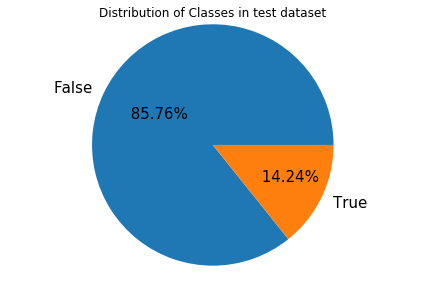

In [19]:
#making a pie chart to show the diversity of the target classes
import matplotlib.pyplot as plt
print(data_test['Churn'].value_counts())
labels = data_test['Churn'].value_counts().keys().tolist()
sizes = data_test['Churn'].value_counts().values.tolist()
fig,ax = plt.subplots()
ax.pie(sizes,labels = labels,radius = 2,autopct='%10.2f%%',textprops = {'fontsize': 15})
ax.axis('equal')
fig.suptitle('Distribution of Classes in test dataset')
fig.tight_layout()
plt.savefig('D:\Extras\CourseraMachineLearningIBM\Assignment\piefortest.png')

In [27]:
#making a pairplot using seaborn library to show the pair wise correlation between the features
import seaborn as sns
col_to_del = list(set(data_train.nunique()[data_train.nunique()<6].keys().tolist() + data_train.select_dtypes(include='object').columns.tolist()))
col_to_viz = [x for x in data_train.columns if x not in col_to_del]
col_to_del
sns.pairplot(data_train[col_to_viz], diag_kind = 'kde')
plt.show
plt.savefig('D:\Extras\CourseraMachineLearningIBM\Assignment\pairplot.png')

['State', 'Voice mail plan', 'Churn', 'Area code', 'International plan']

# 3. Preprocessing of the data

In [2]:
from sklearn.preprocessing import LabelEncoder  #to encode the non-numeric features into numerical features
from sklearn.preprocessing import StandardScaler 

# removing the unnecessary columns from the feature column
col_to_del = ['State', 'Area code', 'Total day charge', 'Total eve charge', 
               'Total night charge', 'Total intl charge']
train_data = data_train.drop(columns = col_to_del, axis = 1)
test_data = data_test.drop(columns=col_to_del,axis = 1)

#defining target column
target_col = ['Churn']

#Separating categorical and numerical columns
# categorical columns which have less than 6 unique values
cat_col = list(set(train_data.nunique()[train_data.nunique()<6].keys().tolist() 
                    + train_data.select_dtypes(include='object').columns.tolist()))
cat_col = [x for x in cat_col if x not in target_col]

#numerical columns
num_col = [x for x in train_data.columns if x not in cat_col + target_col]

#Binary columns with 2 values
bin_col = train_data.nunique()[train_data.nunique() == 2].keys().tolist()

#Columns more than 2 values
multi_col = [i for i in cat_col if i not in bin_col]

#Label encoding Binary columns
le = LabelEncoder()
for i in bin_col:
    train_data[i] = le.fit_transform(train_data[i])
    test_data[i] = le.fit_transform(test_data[i])

#Scaling Numerical columns
std = StandardScaler()
scaled_train = std.fit_transform(train_data[num_col])
scaled_train = pd.DataFrame(scaled_train, columns = num_col)

scaled_test = std.fit_transform(test_data[num_col])
scaled_test = pd.DataFrame(scaled_test, columns = num_col)

#dropping original values merging scaled values for numerical columns
train_data_prep = train_data.drop(columns = num_col, axis = 1)
train_data_prep = train_data_prep.merge(scaled_train, left_index=True, right_index=True, how = 'left')
train_data_prep.head()
test_data_prep = test_data.drop(columns = num_col,axis =1)
test_data_prep = test_data_prep.merge(scaled_test, left_index = True, right_index = True, how = 'left')
train_data_prep.shape

(2666, 14)

# 3.1 Variable Summary after Preprocessing

In [4]:
summary = train_data_prep[[i for i in train_data_prep.columns]].describe().transpose()
summary = summary.reset_index().rename(columns = {'index': 'feature'}).set_index('feature')
summary = np.around(summary,2)
summary

,count,mean,std,min,25%,50%,75%,max
feature,,,,,,,,
International plan,2666.0,0.10,0.30,0.00,0.00,0.00,0.00,1.00
Voice mail plan,2666.0,0.27,0.45,0.00,0.00,0.00,1.00,1.00
Churn,2666.0,0.15,0.35,0.00,0.00,0.00,0.00,1.00
Account length,2666.0,-0.00,1.00,-2.52,-0.70,-0.02,0.67,3.60
Number vmail messages,2666.0,-0.00,1.00,-0.59,-0.59,-0.59,0.81,3.08
Total day minutes,2666.0,0.00,1.00,-3.31,-0.67,0.01,0.67,3.16
Total day calls,2666.0,0.00,1.00,-5.02,-0.67,0.03,0.69,2.99
Total eve minutes,2666.0,-0.00,1.00,-3.93,-0.69,0.01,0.68,3.21
Total eve calls,2666.0,0.00,1.00,-4.96,-0.65,-0.00,0.69,3.47


# 3.2 Using PCA to analyze the data

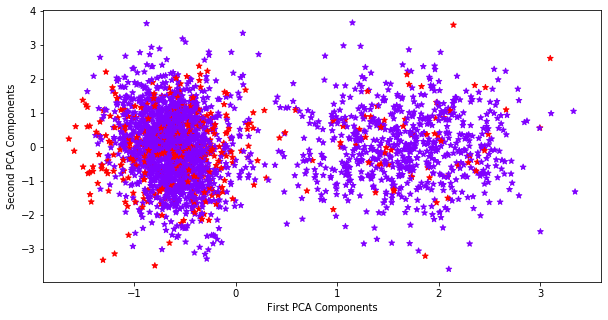

In [98]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components = 2)

X = train_data_prep[[i for i in train_data_prep.columns if i not in target_col]]
Y = train_data_prep[target_col]

principal_components = pca.fit_transform(X)
pca_data = pd.DataFrame(principal_components, columns = ["PC1", "PC2"])
pca_data = pca_data.merge(Y, left_index=True, right_index=True, how="left")
pca_data['PC1']
fig = plt.figure(figsize = (10,5))
ax = plt.scatter(pca_data['PC1'],pca_data['PC2'],c = pca_data['Churn'], cmap = 'rainbow',marker = '*',label = 'Churn')
plt.xlabel('First PCA Components')
plt.ylabel('Second PCA Components')
plt.savefig('D:\Extras\CourseraMachineLearningIBM\Assignment\pcafigure.png')

# 4. Model Building

## 4.1 Defining a function for churn data prediction

In [39]:
def churn_prediction_training(algorithm,x_train,y_train,x_test,y_test):
    algorithm.fit(x_train,y_train)
    predicts = algorithm.predict(x_test)
    probabs = algorithm.predict_proba(x_test)
    
    #Output of classification metrics after training
    #Name of the algorithm
    algorithm_name = type(algorithm).__name__
    print('Algorithm:',algorithm_name)
    
    # Classification Report
    target_names = ['Not Churn','Churn']
    print('\nClassification Report:\n',classification_report(y_test, predicts, target_names = target_names))
    
    #Accuracy of the classification
    print('Accuracy Score:',accuracy_score(y_test,predicts))
    
    #Area under the curve of fpr vs tpr
    model_roc_auc = roc_auc_score(y_test, probabs[:,1]) 
    print('Area Under the Curve:',model_roc_auc)
    
    #Plotting the figure of confusion matrix after training for classification
    fig = plt.figure(figsize = (8,5))
    plot_confusion_matrix(algorithm, x_test,y_test,display_labels = target_names)
    plt.title(f'Confusion Matrix for {algorithm_name}')
    plt.savefig(f'D:\Extras\CourseraMachineLearningIBM\Assignment\ConfusionMatrix({algorithm_name}).png')
    
    #Plotting the figure of roc curve after the classification training
    fig = plt.figure()
    plot_roc_curve(algorithm,x_test,y_test)
    plt.title(f'ROC Curve for {algorithm_name}')
    plt.savefig(f'D:\Extras\CourseraMachineLearningIBM\Assignment\ROCcurve({algorithm_name}).png')

    

## 4.2 Baseline Model (Logistic Regression)

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix, accuracy_score, plot_roc_curve, roc_auc_score
from sklearn.metrics import classification_report, auc, roc_curve
import matplotlib.pyplot as plt

#defining the target class and features to be studied
target_col = ['Churn']
feature_cols = [x for x in train_data_prep.columns if x not in target_col]

#splitting the principal training dataset to subtrain and subtest datasets
x_train, x_test, y_train, y_test = train_test_split(train_data_prep[feature_cols], train_data_prep[target_col],test_size = .25, random_state = 42)

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver = 'liblinear')
#churn_prediction_training(lr,x_train,y_train,x_test,y_test)

## 4.3 Logistic Regression using ADASYN oversampling

In [25]:
from imblearn.over_sampling import ADASYN
ada = ADASYN(random_state = 42)
x_train_ada, y_train_ada = ada.fit_resample(x_train,y_train)

logistic_ada = LogisticRegression(random_state = 42)
#churn_prediction_training(logistic_ada,x_train_ada,y_train_ada,x_test,y_test)

## 4.4 Decision Tree Classifier

Algorithm: DecisionTreeClassifier

Classification Report:
               precision    recall  f1-score   support

   Not Churn       0.94      0.97      0.96       570
       Churn       0.79      0.64      0.71        97

    accuracy                           0.92       667
   macro avg       0.87      0.81      0.83       667
weighted avg       0.92      0.92      0.92       667

Accuracy Score: 0.9235382308845578
Area Under the Curve: 0.7596129499005244


<Figure size 576x360 with 0 Axes>

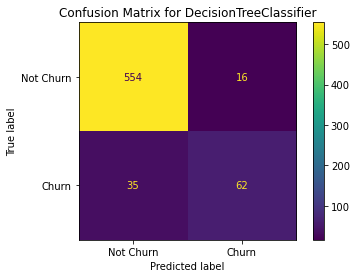

<Figure size 432x288 with 0 Axes>

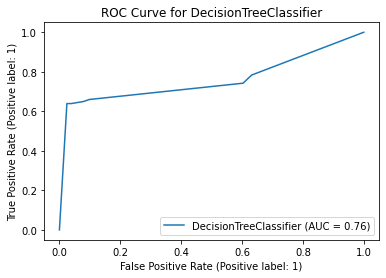

In [88]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree


decision_tree = DecisionTreeClassifier(max_depth = 9, random_state = 123,
                                       splitter = "best", criterion = "gini")
#churn_prediction_training(decision_tree,x_train,y_train,x_test,y_test)
#plot_tree(decision_tree)

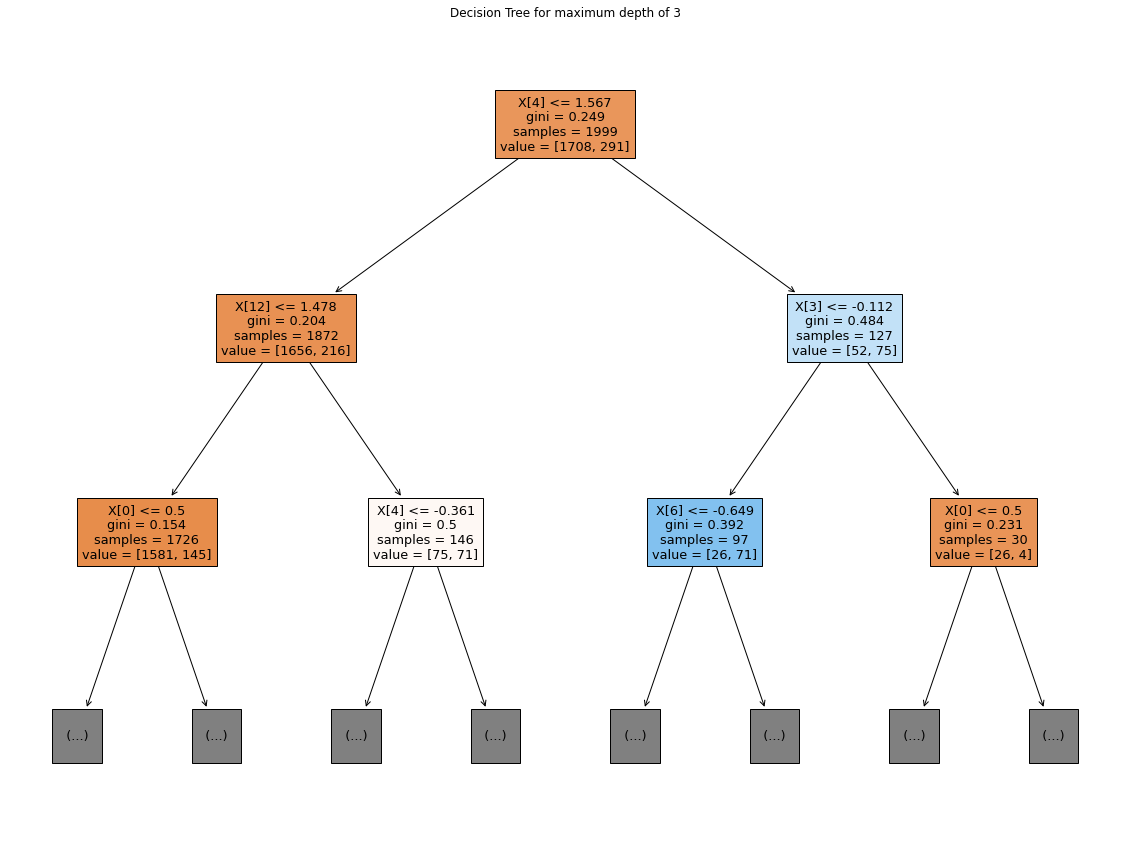

In [59]:
plt.figure(figsize = (20,15))
plot_tree(decision_tree,max_depth = 2,filled=True)
plt.title('Decision Tree for maximum depth of 3')
plt.savefig(f'D:\Extras\CourseraMachineLearningIBM\Assignment\DecisionTree.png')

## 4.5 Random Forest Classifier

C:\Users\Anzan Thapa\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Algorithm: RandomForestClassifier

Classification Report:
               precision    recall  f1-score   support

   Not Churn       0.93      1.00      0.97       570
       Churn       1.00      0.58      0.73        97

    accuracy                           0.94       667
   macro avg       0.97      0.79      0.85       667
weighted avg       0.94      0.94      0.93       667

Accuracy Score: 0.9385307346326837
Area Under the Curve: 0.919714234038705


<Figure size 576x360 with 0 Axes>

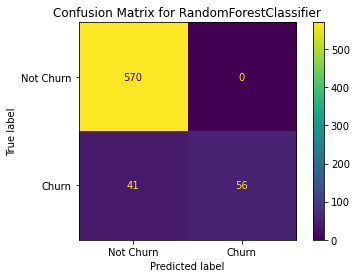

<Figure size 432x288 with 0 Axes>

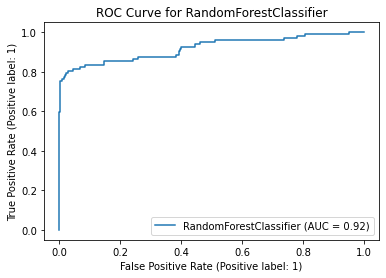

In [85]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 100, random_state = 123,
                             max_depth = 9, criterion = "gini")

churn_prediction_training(rfc, x_train, y_train, x_test, y_test)

## 4.6 Support Vector Machine (Linear Kernel)

C:\Users\Anzan Thapa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Algorithm: SVC

Classification Report:
               precision    recall  f1-score   support

   Not Churn       0.85      1.00      0.92       570
       Churn       0.00      0.00      0.00        97

    accuracy                           0.85       667
   macro avg       0.43      0.50      0.46       667
weighted avg       0.73      0.85      0.79       667

Accuracy Score: 0.8545727136431784
Area Under the Curve: 0.7183396635919695


C:\Users\Anzan Thapa\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Anzan Thapa\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Anzan Thapa\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 576x360 with 0 Axes>

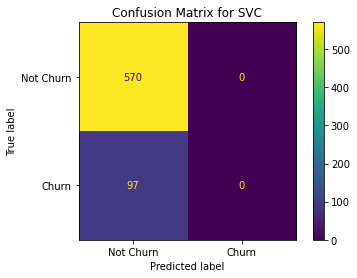

<Figure size 432x288 with 0 Axes>

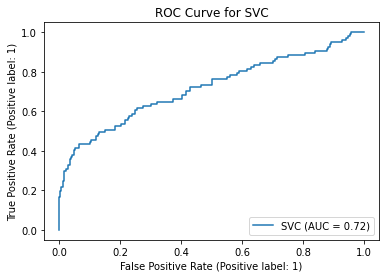

In [89]:
from sklearn.svm import SVC

support_vector = SVC(kernel = 'linear',probability = True,random_state = 123)
churn_prediction_training(support_vector,x_train,y_train,x_test,y_test)

## 4.7 Support Vector Machine (rbf kernel)

C:\Users\Anzan Thapa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Algorithm: SVC

Classification Report:
               precision    recall  f1-score   support

   Not Churn       0.91      1.00      0.95       570
       Churn       0.95      0.42      0.59        97

    accuracy                           0.91       667
   macro avg       0.93      0.71      0.77       667
weighted avg       0.92      0.91      0.90       667

Accuracy Score: 0.9130434782608695
Area Under the Curve: 0.9064839934888769


<Figure size 576x360 with 0 Axes>

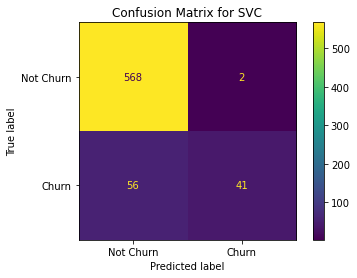

<Figure size 432x288 with 0 Axes>

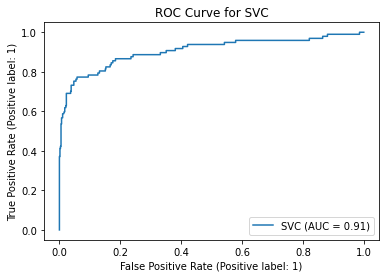

In [6]:
from sklearn.svm import SVC

support_vector = SVC(kernel = 'rbf',gamma = 0.1,probability = True,random_state = 123)
churn_prediction_training(support_vector,x_train,y_train,x_test,y_test)

## 4.8 Gradient Boosting Classifier (Ensemble Method)

C:\Users\Anzan Thapa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Algorithm: GradientBoostingClassifier

Classification Report:
               precision    recall  f1-score   support

   Not Churn       0.95      0.99      0.97       570
       Churn       0.93      0.68      0.79        97

    accuracy                           0.95       667
   macro avg       0.94      0.84      0.88       667
weighted avg       0.95      0.95      0.94       667

Accuracy Score: 0.9460269865067467
Area Under the Curve: 0.9255018990775908


<Figure size 576x360 with 0 Axes>

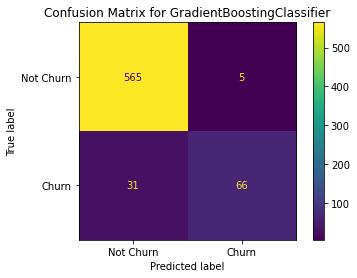

<Figure size 432x288 with 0 Axes>

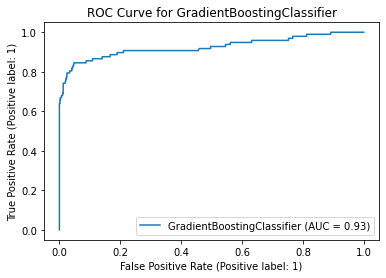

In [8]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(random_state=124)

churn_prediction_training(gbc, x_train, y_train,x_test, y_test)

# 8. Testing using the Testing Dataset from Orange Telecom

## 8.1 Baseline Model (Logistic Regression)

C:\Users\Anzan Thapa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Algorithm: LogisticRegression

Classification Report:
               precision    recall  f1-score   support

   Not Churn       0.88      0.97      0.92       572
       Churn       0.49      0.18      0.26        95

    accuracy                           0.86       667
   macro avg       0.68      0.57      0.59       667
weighted avg       0.82      0.86      0.83       667

Accuracy Score: 0.856071964017991
Area Under the Curve: 0.8263157894736843


<Figure size 576x360 with 0 Axes>

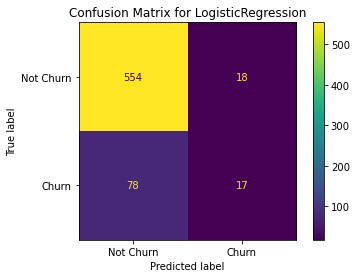

<Figure size 432x288 with 0 Axes>

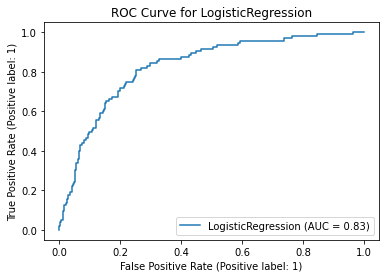

In [24]:
#Training dataset will be principle training dataset of 2666 samples and testing dataset will be the original 667 principle test dataset
x_train,y_train = train_data_prep[feature_cols],train_data_prep[target_col]
x_test,y_test = test_data_prep[feature_cols],test_data_prep[target_col]

churn_prediction_training(lr,x_train,y_train,x_test,y_test)

## 8.2 Logistic Regression with ADASYN Oversampling

C:\Users\Anzan Thapa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Algorithm: LogisticRegression

Classification Report:
               precision    recall  f1-score   support

   Not Churn       0.95      0.75      0.84       572
       Churn       0.34      0.77      0.47        95

    accuracy                           0.76       667
   macro avg       0.65      0.76      0.66       667
weighted avg       0.86      0.76      0.79       667

Accuracy Score: 0.7556221889055472
Area Under the Curve: 0.8246411483253588


<Figure size 576x360 with 0 Axes>

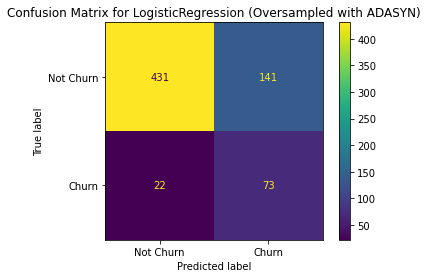

<Figure size 432x288 with 0 Axes>

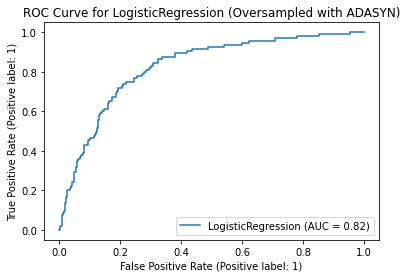

In [38]:
from imblearn.over_sampling import ADASYN
ada = ADASYN(random_state = 42)
x_train_ada, y_train_ada = ada.fit_resample(train_data_prep[feature_cols],train_data_prep[target_col])

logistic_ada = LogisticRegression(random_state = 42)
churn_prediction_training(logistic_ada,x_train_ada,y_train_ada,x_test,y_test)

## 8.3 Decision Tree Classifier

Algorithm: DecisionTreeClassifier

Classification Report:
               precision    recall  f1-score   support

   Not Churn       0.95      0.98      0.96       572
       Churn       0.85      0.69      0.76        95

    accuracy                           0.94       667
   macro avg       0.90      0.84      0.86       667
weighted avg       0.94      0.94      0.94       667

Accuracy Score: 0.9385307346326837
Area Under the Curve: 0.8164335664335665


<Figure size 576x360 with 0 Axes>

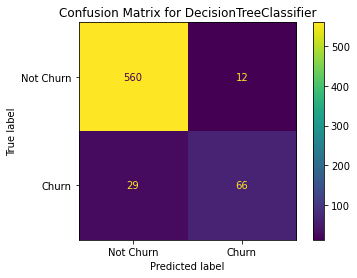

<Figure size 432x288 with 0 Axes>

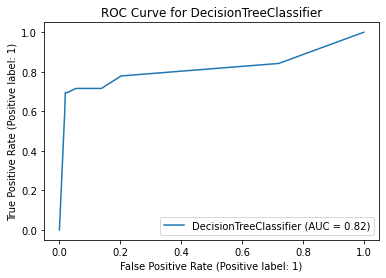

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree


decision_tree = DecisionTreeClassifier(max_depth = 9, random_state = 123,
                                       splitter = "best", criterion = "gini")
churn_prediction_training(decision_tree,x_train,y_train,x_test,y_test)

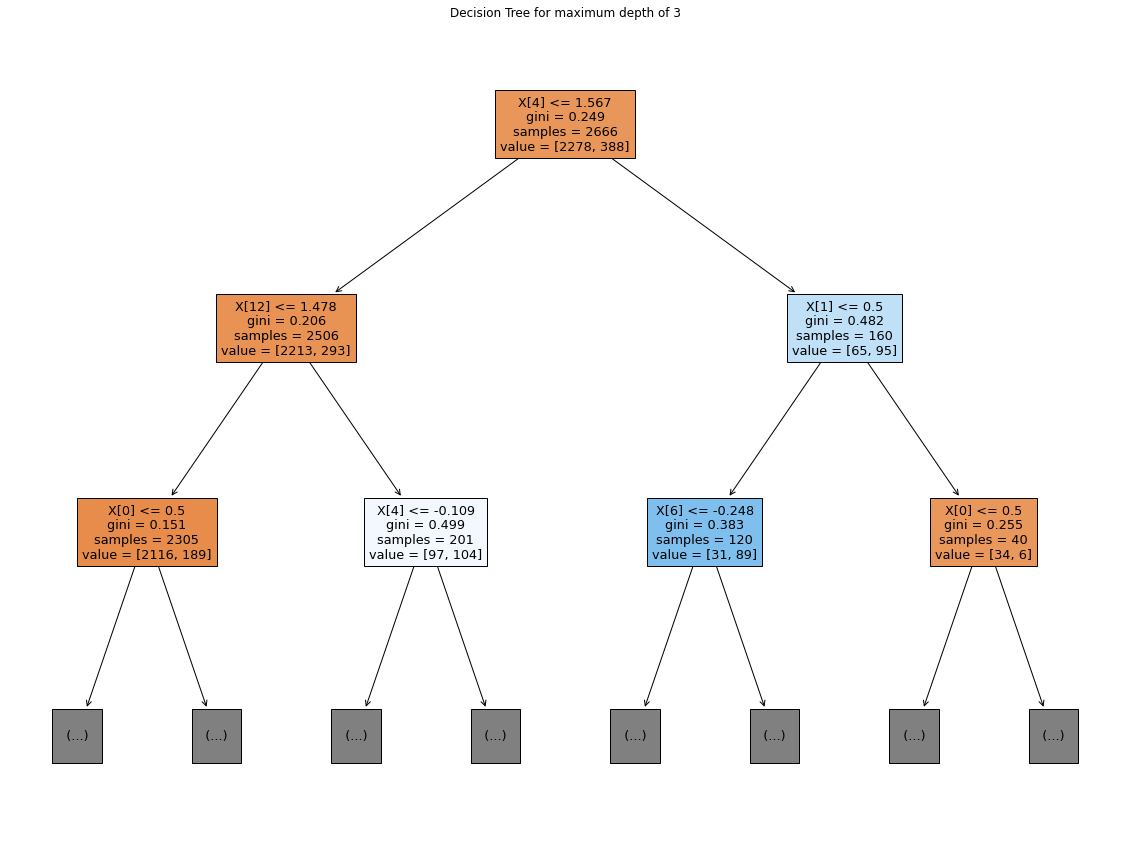

In [29]:
plt.figure(figsize = (20,15))
plot_tree(decision_tree,max_depth = 2,filled=True)
plt.title('Decision Tree for maximum depth of 3')
plt.savefig(f'D:\Extras\CourseraMachineLearningIBM\Assignment\DecisionTree.png')

## 8.4 Random Forest Classifier

C:\Users\Anzan Thapa\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Algorithm: RandomForestClassifier

Classification Report:
               precision    recall  f1-score   support

   Not Churn       0.94      1.00      0.97       572
       Churn       0.97      0.61      0.75        95

    accuracy                           0.94       667
   macro avg       0.95      0.80      0.86       667
weighted avg       0.94      0.94      0.94       667

Accuracy Score: 0.9415292353823088
Area Under the Curve: 0.9235921972764077


<Figure size 576x360 with 0 Axes>

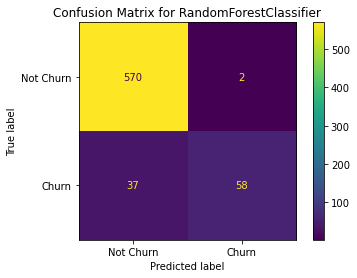

<Figure size 432x288 with 0 Axes>

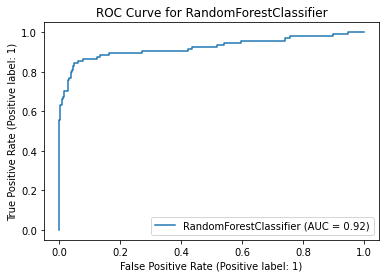

In [30]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 100, random_state = 123,
                             max_depth = 9, criterion = "gini")

churn_prediction_training(rfc, x_train, y_train, x_test, y_test)

## 8.5 SVM with Linear Kernel

C:\Users\Anzan Thapa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Algorithm: SVC

Classification Report:
               precision    recall  f1-score   support

   Not Churn       0.86      1.00      0.92       572
       Churn       0.00      0.00      0.00        95

    accuracy                           0.86       667
   macro avg       0.43      0.50      0.46       667
weighted avg       0.74      0.86      0.79       667

Accuracy Score: 0.8575712143928036
Area Under the Curve: 0.7847994111152006


C:\Users\Anzan Thapa\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Anzan Thapa\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Anzan Thapa\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 576x360 with 0 Axes>

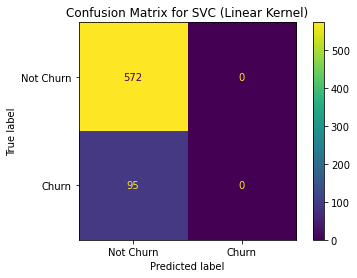

<Figure size 432x288 with 0 Axes>

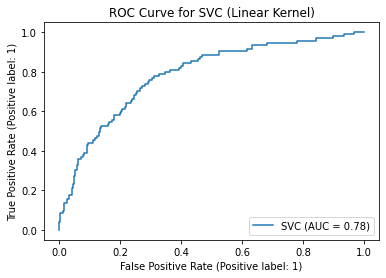

In [34]:
from sklearn.svm import SVC

support_vector = SVC(kernel = 'linear',probability = True,random_state = 123)
churn_prediction_training(support_vector,x_train,y_train,x_test,y_test)

## 8.6 SVM with RBF Kernel

C:\Users\Anzan Thapa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Algorithm: SVC

Classification Report:
               precision    recall  f1-score   support

   Not Churn       0.91      0.99      0.95       572
       Churn       0.90      0.40      0.55        95

    accuracy                           0.91       667
   macro avg       0.91      0.70      0.75       667
weighted avg       0.91      0.91      0.89       667

Accuracy Score: 0.9085457271364318
Area Under the Curve: 0.9269138755980861


<Figure size 576x360 with 0 Axes>

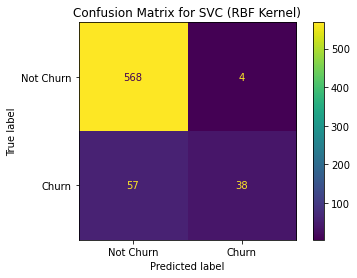

<Figure size 432x288 with 0 Axes>

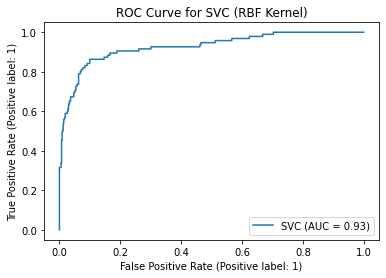

In [36]:
from sklearn.svm import SVC

support_vector = SVC(kernel = 'rbf',gamma = 0.1,probability = True,random_state = 123)
churn_prediction_training(support_vector,x_train,y_train,x_test,y_test)

## 8.7 Gradient Boosting Agorithm (Ensemble Method)

C:\Users\Anzan Thapa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Algorithm: GradientBoostingClassifier

Classification Report:
               precision    recall  f1-score   support

   Not Churn       0.95      0.99      0.97       572
       Churn       0.94      0.66      0.78        95

    accuracy                           0.95       667
   macro avg       0.94      0.83      0.87       667
weighted avg       0.95      0.95      0.94       667

Accuracy Score: 0.9460269865067467
Area Under the Curve: 0.9284781008465218


<Figure size 576x360 with 0 Axes>

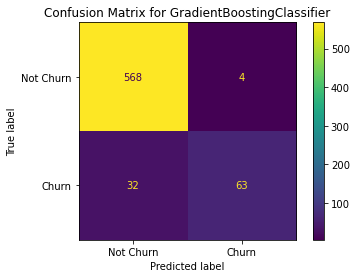

<Figure size 432x288 with 0 Axes>

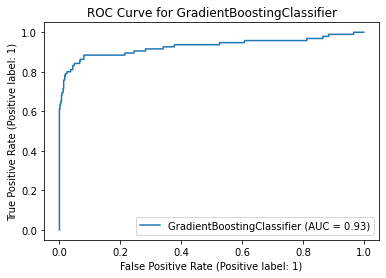

In [40]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(random_state=124)

churn_prediction_training(gbc, x_train, y_train,x_test, y_test)